# Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [10]:
# Load Datasets
df = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
# Exclude Rows with TotalCharges Column Contains White Space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [12]:
# Transform TotalCharges Column to Float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
# Top 5 Rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Standard Data Cleansing

## Missing Values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Duplicated Values

In [15]:
df.duplicated().sum()

0

# Standard EDA

## Statistical Summary of Columns

In [16]:
# Group Column Names Based on Type

categoricals = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
                'PaperlessBilling','PaymentMethod','Churn']

numericals = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [17]:
# Numerical Statistical Summary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
* `SeniorCitizen` column is boolean/binary column since the value is 0 or 1
* Overall, the minimum and maximum values make sense for each column
* Mean > 50% (Median) in `tenure` and `TotalCharges`, indicating both are slightly positive skewed distribution
* Mean < 50% (Median) in `MonthlyCharges` column, indicating it is a slightly negative skewed distribution

In [18]:
# Categorical Statistical Summary
df[categoricals].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
* `gender` has 2 unique values, 'Male', and 'Female'
* `Partner`, `Dependents`,`PhoneService`,`MultipleLines`,`Churn` have 2 unique values, 'yes', and 'no'
* Most customers are male
* Most customers do not have partner, dependents and multiple lines
* Most customers already have phone service

## Univariate Analysis


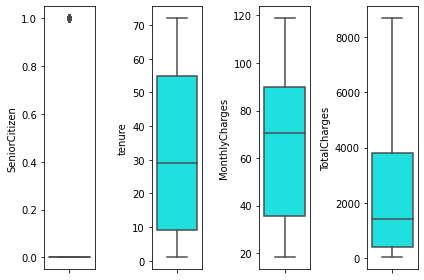

In [20]:
# Boxplot to Detect Outliers
features = numericals

for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

Obervation:

* There is no outlier
* `SeniorCitizen` has boolean value, 0 and 1.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

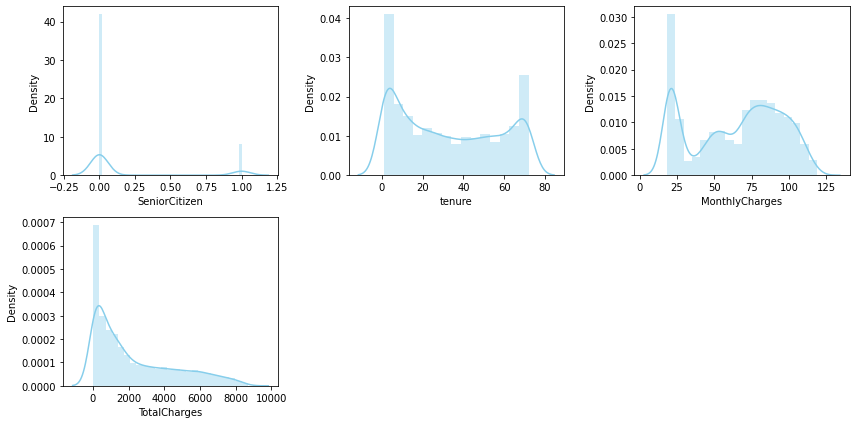

In [21]:
# KDE Plot to Know the Distribution Form

# Adjust the Figure Size for Better Readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
* There is no symmetric distribution from our data frame
* `SeniorCitizen` has boolean value, 0 and 1

## Multivariate Analysis

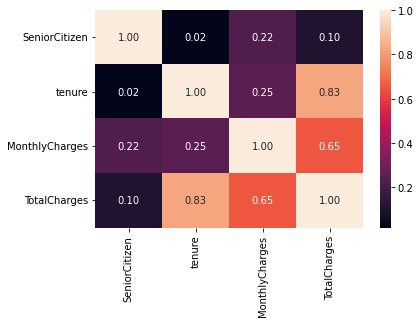

In [23]:
# Correlation Heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
* `tenure` and `TotalCharges` are highly correlated

# Perform Deep-dive Exploration 

1. Is the longer a person becoming customer (loyal), the less likely that person will churn?
2. Do loyal customers tend to spend higher monthly cost too, if compared to new customers?

## 1. Is the longer a person becoming customer (loyal), the less likely that person will churn?

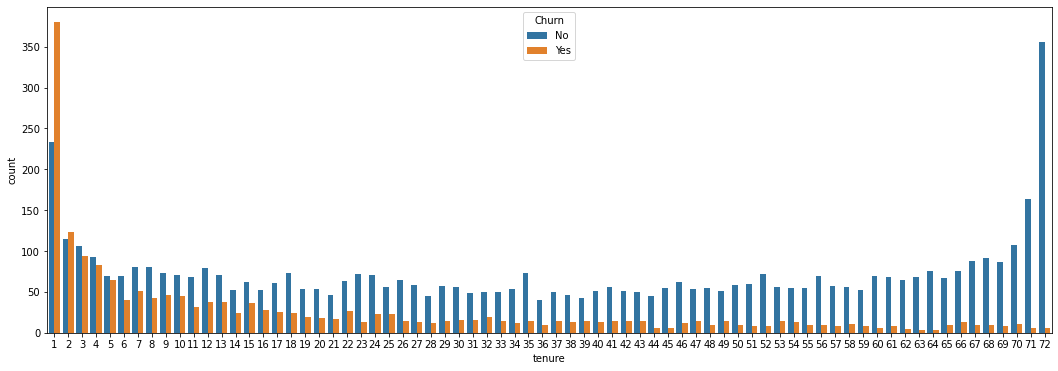

In [27]:
# Adjust the Figure Size for Better Readability
plt.figure(figsize=(18,6))

sns.countplot(data=df,
            x='tenure',
            hue='Churn')

Observation:
* Customers with lower service tenures (new clients) are more likely churning than customers with longer tenures.

## 2. Do loyal customers tend to spend higher monthly cost too, if compared to new customers?

In [28]:
df_tenure = (df
             .groupby('tenure')
             .agg(avg_monthly_charges = ('MonthlyCharges','mean'))
             .reset_index()
             )
df_tenure

,tenure,avg_monthly_charges
0,1,50.485808
1,2,57.206303
2,3,58.015000
3,4,57.432670
4,5,61.003759
...,...,...
67,68,73.321000
68,69,70.823158
69,70,76.378992
70,71,73.735588


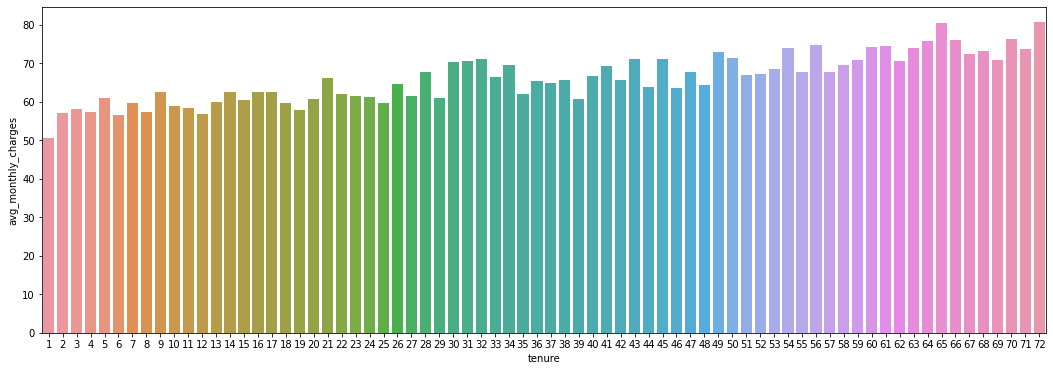

In [29]:
# Adjust the Figure Size for Better Readability
plt.figure(figsize=(18,6))

sns.barplot(data=df_tenure, x = 'tenure', y = 'avg_monthly_charges')

Observation:
* Customers with longer service tenures (loyal clients) tend to spend higher average monthly cost, compared to customers with lower tenures.